In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
sales = pd.read_csv('C:\\Users\\HP\\Downloads\\Diwali Sales Data.csv', encoding='latin1')
sales.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
sales.shape

(11251, 15)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
sales.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

- the columns named 'Status' & 'unnamed1' have 11251 null values(which is there is no information in that 2 columns)
- Amount has 12 null value

In [9]:
sales.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [10]:
# Drop the two column  'Status' & 'unnamed1'
sales.drop([ 'Status','unnamed1'], axis=1,inplace=True)

In [11]:
sales.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
#drop null values
sales.dropna(inplace=True)

In [13]:
sales.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
sales.shape

(11239, 13)

In [15]:
# Change Data types

In [16]:
sales['Amount']=sales['Amount'].astype('int') # coverting decimel value to wholenumber

##  EDA

#### Gender

In [17]:
sales.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

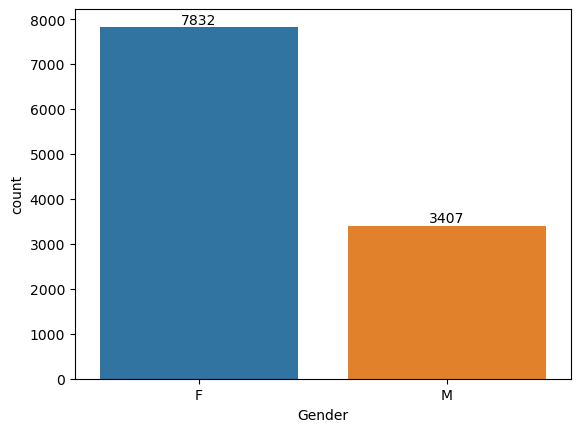

In [18]:
ax=sns.countplot(data=sales,x='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

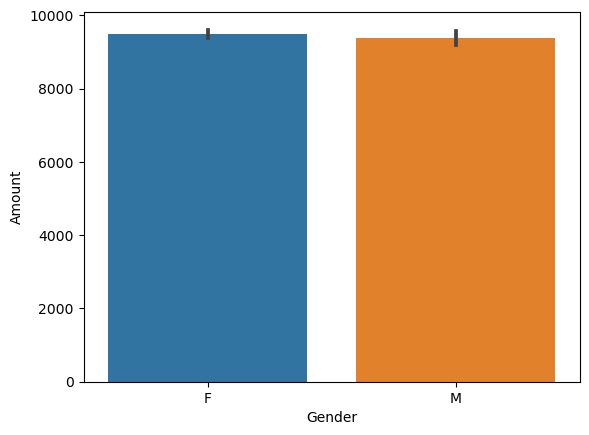

In [19]:
sns.barplot(x='Gender',y='Amount',data=sales)



- Women purchaes more and they spend more on purchase 

#### AGE 

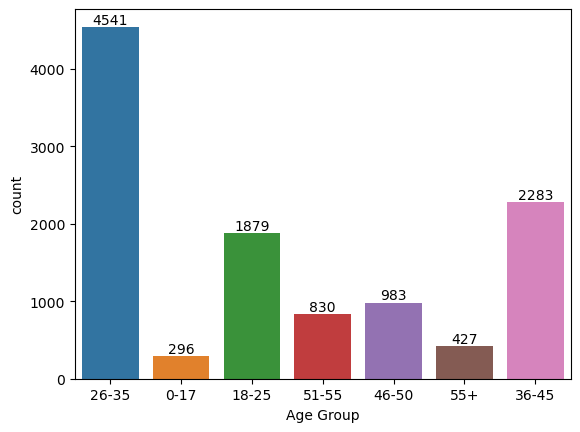

In [20]:
ax=sns.countplot(data=sales,x='Age Group')
for bars in ax.containers:
    ax.bar_label(bars)

- People in the age group 26-35 shop more and people below 17 years shop less

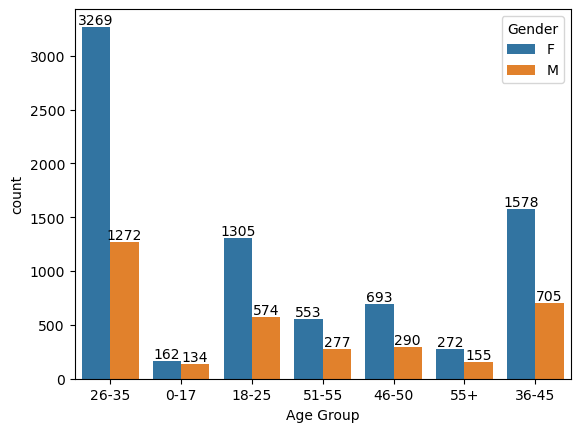

In [21]:
ax=sns.countplot(data=sales,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

 - In every age group Females shops more than Males

#### STATE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'Andhra\xa0Pradesh'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Karnataka'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'Himachal Pradesh'),
  Text(6, 0, 'Delhi'),
  Text(7, 0, 'Jharkhand'),
  Text(8, 0, 'Kerala'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Madhya Pradesh'),
  Text(11, 0, 'Bihar'),
  Text(12, 0, 'Rajasthan'),
  Text(13, 0, 'Uttarakhand'),
  Text(14, 0, 'Telangana'),
  Text(15, 0, 'Punjab')])

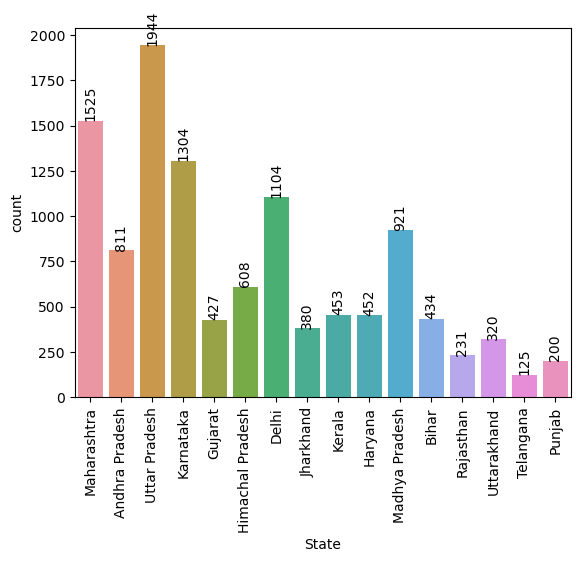

In [22]:
ax=sns.countplot(data=sales,x='State')
for bars in ax.containers:
    ax.bar_label(bars,rotation=90)
plt.xticks(rotation=90)


- People from Uttar Pradesh purchase more followed by Maharashtra and Karnataka

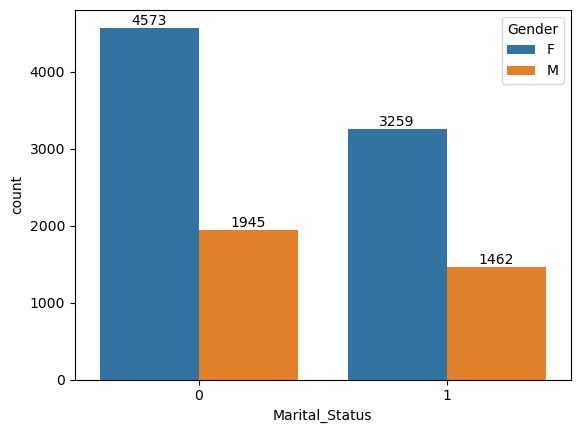

In [27]:
ax=sns.countplot(data=sales,x='Marital_Status',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

- Married people purchase more. And Females who are married purchase more compared to married males

#### OCCUPATION 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Govt'),
  Text(2, 0, 'Automobile'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Food Processing'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Banking'),
  Text(8, 0, 'Retail'),
  Text(9, 0, 'IT Sector'),
  Text(10, 0, 'Aviation'),
  Text(11, 0, 'Hospitality'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Chemical')])

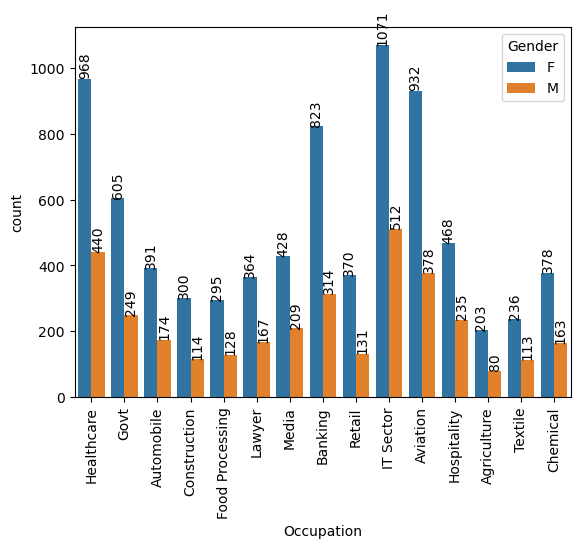

In [30]:
ax=sns.countplot(data=sales,x='Occupation',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars,rotation=90)
plt.xticks(rotation=90)

- Females who are working in IT Sector purchases more, followed by females working in Health care and aviation field

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

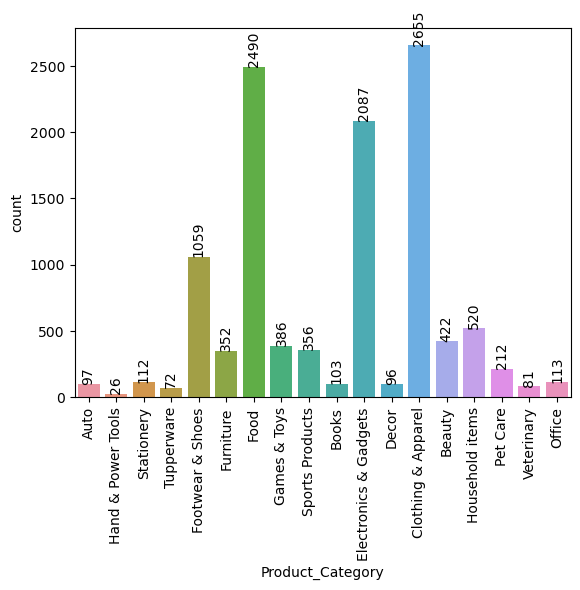

In [32]:
ax=sns.countplot(data=sales,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars,rotation=90)
plt.xticks(rotation=90)

- People spends more onclothing followed by food and electronics

# Conclusion

- Married women, age between 26-35 who are working in IT,Health Care and Aviation sector more likely to purchase products from Cloths,food and electronics category